# Linear Algebra Module - Test (October 27, 2017)
## Due Tuesday, November 7, 2017 at Noon


You may use all Notes & Exercises (with answers) from class and the entirety of the internet to help you complete this assignment, but there is **ABSOLUTELY NO COLLABORATION PERMITTED**.
 
   
## Answering Instructions

- Some of the questions below require you to write some code; you will be principally graded on whether the results the code produces (plots, computations, etc.) are correct. But if the results are incorrect, and **if** you wrote clean intelligible code, you may salvage some points if the code is partially correct. (This won't work if your code is hard to follow.)

- Some of the questions require a written answer.  Where you are asked for handwritten math, you could try writing LaTeX in the notebook (for example, like this: $x = \begin{bmatrix}1 & 2 \\ 3 & 4 \end{bmatrix}$ ).  But most of you will be unfamiliar with the notation for doing that, and we're not expecting you to learn it. Alternatively, you could write it by hand on paper, take a picture of it with your phone, and include it here. 
 
## Submission Instructions
- Failure to follow submission instructions **EXACTLY** may result in a grade of **0**

- **No Late Submissions** without a Dean's Excuse, an assignment submitted after the due date may result in a grade of **0**

- Please send an email to the TA grader for this module, Anqi Wu, at `anqiw@princeton.edu` with the subject line:

> `[NEU_314_2017] FirstName LastName Assignment 2`

> For example, "[NEU_314_2017] Jane Smith Assignment 2"

- In the email, please attach **only** your completed notebook file **and** any image files you've added. Make sure you don't forget to include any image files that you've used! Files forgotten will count as files not made. The notebook should be renamed to have the filename:

> `FirstName_LastName_Assignment2.ipynb`

> For example, "Jane_Smith_Assignment2.ipynb"



- Please run the `Restart & Clear Output` option on your notebook before saving and sending your notebook (the grader will do this anyway if you don't)
 
 
### Total Score out of 30 points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline


Use the following command to load some data into a matrix X:

In [2]:
from scipy.io import loadmat
X = loadmat("datafile.mat")["X"]

---
### 1a (1 pt)
How many columns and how many rows does X have?

In [3]:
n_row, n_col = X.shape
print('X has %s rows and %s columns.' %(n_row, n_col))

X has 2 rows and 1200 columns.


---
### 1b (3 pts)
The data are neuron firing rates (spikes/sec). Each row represents a neuron, and each column represents the average firing rate during one trial of an experiment. We want to know whether firing patterns cluster into different groups, and whether the neurons are correlated with each other.

Make a scatterplot of the data in the first row versus the data in the second row. Does knowing the value of the firing rate of Neuron 1 on a given trial tell you anything about the firing rate of Neuron 2 in that trial? Separately from that question, how many "clumps" of data points do you see?


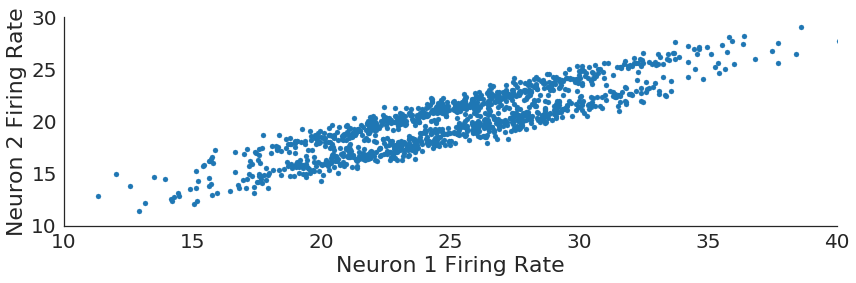

In [4]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.scatter(*X,s=25)
ax.set(xlim=(10,40),  xlabel='Neuron 1 Firing Rate', ylim=(10,30), ylabel='Neuron 2 Firing Rate')

sns.despine()
plt.tight_layout()

The firing rates of the two neurons seem to be positively correlated such that a higher firing rate of Neuron 1 on trial $i$ would predict a similarly high firing rate of Neuron 2. There appear to be two clumps of data points in the scatterplot.

---
### 1c (2 pts)
Plot the data again after subtracting a constant from each row such that the mean of each row is now zero. From here on, we'll be working with this "demeaned" data set.

In [5]:
def demean(arr):
    return arr - arr.mean()

## De-mean data.
X = np.apply_along_axis(demean, 1, X)

## Show new means.
print('Means = %s' %X.mean(axis=1).round(3))

Means = [ 0.  0.]


---
### 1d (2 pts)
Compute and write down the _covariance_ matrix for the data --- in other words, a matrix with elements $C_{ij}$ where each element is the covariance across trials of the firing rates of neuron $i$ and neuron $j$.  That is, the final matrix should be of dimension number of neurons by number of neurons.

Remember, the covariance is computed after first subtracting the mean!


#### Answer

The covariance matrix is computed as:

> $cov(X,Y) = \frac{1}{n} \sum\limits_{i=1}^n(x_i - E(X))(y_i - E(y))$

which simplifies after demeaning to:

> $cov(X,Y) = \frac{1}{n} \sum\limits_{i=1}^n(x_i)(y_i)$

which is equivalent to the inner product of X and Y. It is worth noting that the covariance of a variable with itself is identical to its variance:

> $cov(X,X) = var(X) $

> $ =  \frac{1}{n} \sum\limits_{i=1}^n(x_i - E(X))(x_i - E(X)) = \frac{1}{n} \sum\limits_{i=1}^n(x_i - E(X))^2$ 

In [6]:
## Preallocate space.
C = np.zeros((n_row, n_row))

## Iteratively estimate formula above.
for i in np.arange(n_row):
    
    for j in np.arange(n_row):
        
        C[i,j] = ( 1 / (n_col) ) * np.inner( X[i], X[j] )
        
print(C.round(3))

[[ 20.092  11.558]
 [ 11.558   8.602]]


---
### 1e (4 pts)
Compute, by hand, the eigenvalues and eigenvectors of $C$. (You can use Numpy for basic math operations, e.g. square roots and so on, but don't use Numpy to compute the eigenvectors). Show us your work so we know that you didn't just call `np.linalg.eig()`  $~~~$  :)


#### Finding the eigenvalues

Some value, $\lambda$, is an eigenvalue of C if and only if:
> $det(\lambda I - C) = 0$

Therefore, we can solve for the eigenvalues via:

> $det(\begin{bmatrix}\lambda & 0 \\ 0 & \lambda  \end{bmatrix} 
- \begin{bmatrix}C_{11} & C_{12} \\ C_{21} & C_{22} \end{bmatrix} ) = 0$

> $det(\begin{bmatrix}\lambda - C_{11}& -C_{12} \\ -C_{21} & \lambda - C_{22}  \end{bmatrix} ) = 0$

> $ (\lambda - C_{11})(\lambda - C_{22}) - (C_{12})(C_{21}) = 0$

> $ \lambda^2 - \lambda (C_{11} + C_{22}) + (C_{11}C_{22} - C_{12}C_{21}) = 0$

Using Python below, we can estimate these numbers:

In [7]:
a = 1
b = C[0,0] + C[1,1]
c = C[0,0]*C[1,1] - C[0,1]*C[1,0]

print('C11 + C22 = %0.3f' %(b))
print('(C11)(C22) - (C12)(C21) = %0.3f' %( c ))

C11 + C22 = 28.694
(C11)(C22) - (C12)(C21) = 39.239


So we get approximately the characteristic polynomial:

> $\lambda^2 - 28.718\lambda + 39.304$

Which we can solve using the *np.roots* function:

In [8]:
eigenvalues = np.roots([a,-b,c])
print('Eigenvalues = %s' %eigenvalues.round(3))

Eigenvalues = [ 27.255   1.44 ]


#### Finding the eigenvectors
Given our eigenvalues, $\lambda$, we can now solve for our eigenvectors. We start with the knowledge that:

> $C \overrightarrow v = \lambda \overrightarrow v  $

> $ \lambda \overrightarrow v - C \overrightarrow v = 0 $

> $ (\lambda - C)\overrightarrow v = 0 $

> $ (\lambda I - C)\overrightarrow v = 0 $

> $(\begin{bmatrix}\lambda & 0 \\ 0 & \lambda  \end{bmatrix} 
- \begin{bmatrix}C_{11} & C_{12} \\ C_{21} & C_{22} \end{bmatrix} )\overrightarrow v = 0$

> $\begin{bmatrix}\lambda - C_{11}& -C_{12} \\ -C_{21} & \lambda - C_{22}  \end{bmatrix} \overrightarrow v = 0$


where we can plug in our eigenvalues, $\lambda_1$ and $\lambda_2$, to find the eigenvectors that satisfy the null space of the matrix above.

In [9]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Solving for first eigenvector.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Setup matrix.
m1 = np.identity(n_row) * eigenvalues[0] - C

print(m1.round(3))

[[  7.162 -11.558]
 [-11.558  18.653]]


In [10]:
## Add -m1[1,0] / m1[0,0] multiplied by the first row to the second row.
multiplier = -m1[1,0] / m1[0,0]
m1[1] += multiplier * m1[0]

print(m1.round(3))

[[  7.162 -11.558]
 [  0.      0.   ]]


In [11]:
## Divide matrix by m1[0,0].
m1 /= m1[0,0]

print(m1.round(3))

[[ 1.    -1.614]
 [ 0.     0.   ]]


So now, when $\lambda_1 \approx 27.277$, we know:

> $\begin{bmatrix}1 & -1.614 \\ 0 & 0 \end{bmatrix} \begin{bmatrix}v_1 \\ v_2 \end{bmatrix}  = 0$

> $ v_1 - 1.614v_2 = 0$

> $ v_1 = 1.614v_2$

such that the first eigenvector is approximately:

> $ E_1 = \overrightarrow v_1 = \begin{bmatrix} 1.614 \\ 1 \end{bmatrix} $

In [12]:
## Save eigenvector 1.
E1 = m1[0,::-1] * [-1,1]
print(E1.round(3))

[ 1.614  1.   ]


In [13]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Solving for second eigenvector.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Setup matrix.
m2 = np.identity(n_row) * eigenvalues[1] - C

print(m2.round(3))

[[-18.653 -11.558]
 [-11.558  -7.162]]


In [14]:
## Add -m2[1,0] / m2[0,0] multiplied by the first row to the second row.
multiplier = -m2[1,0] / m2[0,0]
m2[1] += multiplier * m2[0]

print(m2.round(3))

[[-18.653 -11.558]
 [  0.      0.   ]]


In [15]:
## Divide matrix by m2[0,0].
m2 /= m2[0,0]

print(m2.round(3))

[[ 1.    0.62]
 [-0.   -0.  ]]


So now, when $\lambda_2 \approx 1.441$, we know:

> $\begin{bmatrix}1 & 0.62 \\ 0 & 0 \end{bmatrix} \begin{bmatrix}v_1 \\ v_2 \end{bmatrix}  = 0$

> $ v_1 + 0.62v_2 = 0$

> $ v_1 = -0.62v_2$

such that the second eigenvector is approximately:

> $ E_2 = \overrightarrow v_2 = \begin{bmatrix} -0.62 \\ 1 \end{bmatrix} $

In [16]:
## Save eigenvector 2.
E2 = m2[0,::-1] * [-1,1]
print(E2.round(3))

[-0.62  1.  ]


---
### 1f (2 pts)
Confirm with `np.linalg.eig()` that the eigenvectors that you just found manually are, indeed, eigenvectors of $C$ and that each one does indeed have the eigenvalue that you computed above.


In [17]:
U, V = np.linalg.eig(C)
V = V[np.argsort(U)[::-1]]
U = U[np.argsort(U)[::-1]]

print('Eigenvalues: %s' %U.round(3))
print('Eigenvector 1: %s' %V[:,0].round(3))
print('Eigenvector 2: %s' %V[:,1].round(3))

Eigenvalues: [ 27.255   1.44 ]
Eigenvector 1: [ 0.85   0.527]
Eigenvector 2: [-0.527  0.85 ]


In [18]:
## Compare eigenvalues.
print('Eigenvalues equal?: %s' %np.allclose( eigenvalues, U ))

Eigenvalues equal?: True


In [19]:
## Compare eigenvectors.
print('Eigenvector 1 equal?: %s' %np.allclose(E1, V[:,0] * E1 / V[:,0]))
print('Eigenvector 2 equal?: %s' %np.allclose(E2, V[:,1] * E2 / V[:,1]))

Eigenvector 1 equal?: True
Eigenvector 2 equal?: True


---
### 1g (2 pts)
Now change basis to the eigenvector basis --- in other words, we're going to express every point in the plane as a linear combination of the two eigenvectors. We'll call this basis the "eigenbasis". In other words, what you need to do is compute a new data matrix, $X_{new}$ , that has as many rows and columns as the original $X$, but each column now tells us the coordinates of the corresponding data points in the eigenbasis. 

In [20]:
eigenvectors = V.copy()
X_new = eigenvectors.T.dot(X)

---
### 1h (3 pts)
Re-plot the data, but now in the eigenbasis --- in other words, use the first eigenbasis coordinate as the horizontal axis, and the second eigenbasis coordinate as the vertical axis.  Looking at your new scatterplot, does it seem to you that knowing the value of the first coordinate in the eigenbasis on a given trial (remember, each data point is a trial) tells you anything about the value of the second coordinate?


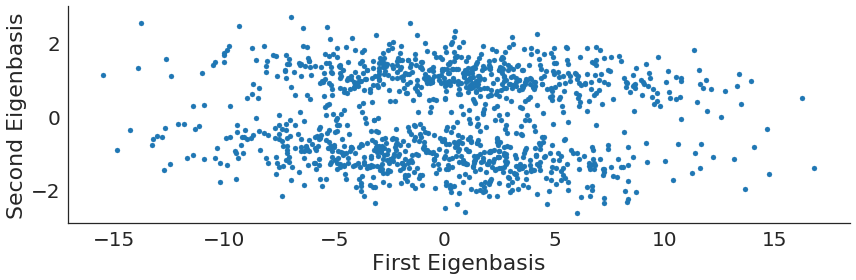

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.scatter(*X_new,s=25)
ax.set(xlabel='First Eigenbasis', ylabel='Second Eigenbasis')

sns.despine()
plt.tight_layout()

In this new eigenbasis, values of the first eigenvalues seem roughly uncorrelated with eigenvalues of the second eigenbasis such that position of a datapoint on the X-axis (1st eigenbasis) does not reveal information about its position on the Y-axis (2nd eigenbasis).

---
### 1i (3 pts)
Use the general formula 

$$M_{new} = V^{-1} M V$$

where $M$ is a matrix and the columns of $V$ are the new basis vectors, to compute $C_{new}$ in the eigenbasis.  What do you notice about the off-diagonals? How does that relate to your answer in **(1h)** above, on whether knowing the value of the first coordinate tells you something about the second coordinate?


In [22]:
C_new = np.linalg.inv(eigenvectors).dot(C).dot(eigenvectors)
print(C_new.round(3))

[[ 27.255   0.   ]
 [  0.      1.44 ]]


The covariance terms (off-diagonals) of $C_{new}$ are zero, reflecting the lack of relationship between the two columns of data in this new eigenbasis.

---
### 1j (2 pts)
Treating $X_{new}$ as if it were a fresh new data set (in other words, don't use **(1i)** to answer this one), compute the covariance matrix for $X_{new}$. How does this compare to the $C_{new}$ that you computed in **(1i)** ?


In [23]:
## Preallocate space.
C_new = np.zeros((n_row, n_row))

## Iteratively estimate formula above.
for i in np.arange(n_row):
    
    for j in np.arange(n_row):
        
        C_new[i,j] = ( 1 / (n_col) ) * np.inner( X_new[i], X_new[j] )
        
print(C_new.round(3))

[[ 27.255   0.   ]
 [  0.      1.44 ]]


They are identical. 

---
### 1k (4 pts)
Project all the data onto the eigenvector with the largest eigenvalue. In other words, each data point should now become a scalar, indicating the distance along the eigenvector direction onto which the point was projected.  Putting the results of all those projections into the vector `x_proj`, use
    
> `plt.hist(x_proj)`

to plot a histogram of the values in that vector.
    
Now **repeat the projection** and make _another_ histogram, but now for projections onto the eigenvector with the _smaller_ eigenvalue.


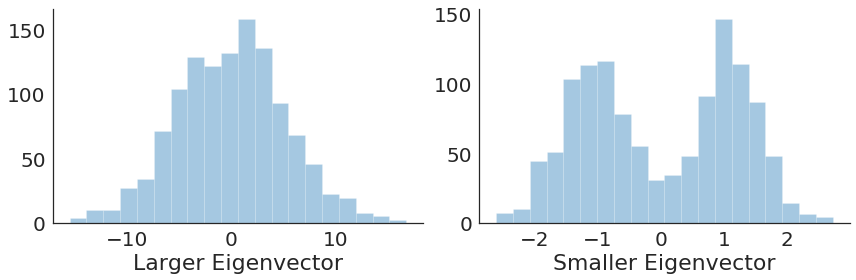

In [24]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

for n, ax, xlabel in zip(range(2), axes, ['Larger Eigenvector', 'Smaller Eigenvector']):
    
    ## Project data.
    x = eigenvectors[:,n].dot(X)
    
    ## Plot.
    sns.distplot(x, bins=20, kde=False, hist_kws=dict(edgecolor='w', linewidth=0.5), ax=ax)
    ax.set(xlabel=xlabel)
    
sns.despine()
plt.tight_layout()

---
### 1l (2 pts)
Suppose you decided that you wanted to reduce the number of dimensions in the data, to help you visualize it. People doing this often project onto the eigenvectors with the largest eigenvalues.  For this particular data set, which of the two projections that you did above would best help you notice whether there are separate "clumps" in the data? The projection onto the eigenvector with the larger or with the smaller eigenvalue?
    

The smaller eigenvalue as the clumps seemed to be separated on the second eigenbasis (i.e. smaller eigenvalue). 